In [406]:
import numpy as np
from sklearn.svm import SVC
X=np.array([[0,0],[1,1]])
Y=np.array([[-1],[1]])
Xtest=np.array([[-0.7, -1]])
model=SVC()
model.fit(X,Y)
model.predict(Xtest)
model.support_vectors_

/home/masa1771/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 0.],
       [1., 1.]])

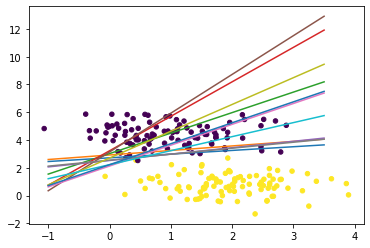

In [407]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X,Y=make_blobs(n_samples=200,centers=2, random_state=0, cluster_std=0.8)
model=SVC(kernel='linear',C=1)
model.fit(X,Y)

##support_vectors
x_range=np.linspace(-1,3.5)
a=model.support_vectors_[:,0]
b=model.support_vectors_[:,1]

for i in range(0,len(a)):
        plt.plot(x_range, a[i]*x_range+b[i])
plt.scatter(X[:,0],X[:,1],c=Y, s=20)        

/home/masa1771/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


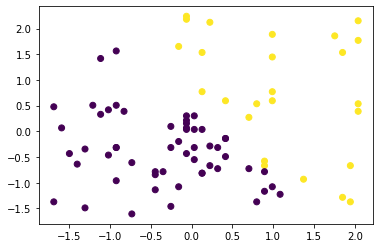

In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
##age_salary dataset
df=pd.DataFrame(pd.read_csv('age_salary.csv'))
df.head()
X=df.iloc[:,[2,3]]
Y=df.iloc[:,[4]]
##preprocessing data
scaler=StandardScaler()
X=scaler.fit_transform(X)
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X,Y, test_size=0.2, random_state=10)
model=SVC(kernel='linear',C=10)
model.fit(Xtrain,Ytrain)
ypred=model.predict(Xtest)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ypred)

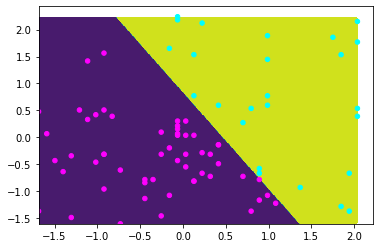

In [409]:
##prepare a mesh of test dataset
age_range=np.arange(Xtest[:,0].min(),Xtest[:,0].max(), step=0.01)
salary_range=np.arange(Xtest[:,1].min(),Xtest[:,1].max(), step=0.01)
xx,yy=np.meshgrid(age_range,salary_range)
xtest_new=np.array([xx.reshape(-1),yy.reshape(-1)]).T
ypred_new=model.predict(xtest_new)
z=ypred_new.reshape(xx.shape)
plt.contourf(xx,yy,z)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ypred, cmap='cool_r', s=20)

/home/masa1771/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


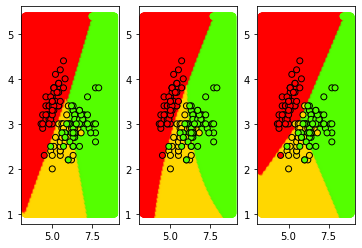

In [410]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC, LinearSVC

X=load_iris().data[:,:2]
Y=load_iris().target
models=(SVC(kernel='linear',C=1),SVC(kernel='poly',C=1), LinearSVC(C=1))
models=(model.fit(X,Y) for model in models)


##test dataset
x_1=np.arange(X[:,0].min()-1,X[:,0].max()+1, 0.01)
x_2=np.arange(X[:,1].min()-1,X[:,1].max()+1, 0.01)
xx_1, xx_2=np.meshgrid (x_1,x_2)
xx_test=np.c_[xx_1.reshape(-1),xx_2.reshape(-1)]

Z=np.array([model.predict(xx_test) for model in models])


fig, ax = plt.subplots(1,3)
for i in range(0, 3):
    ypred=Z[i].reshape(xx_1.shape)
    ax[i].scatter(xx_1,xx_2,c=ypred,cmap='prism')
    ax[i].scatter(X[:,0],X[:,1],c=Y, cmap='prism',edgecolors='k')    

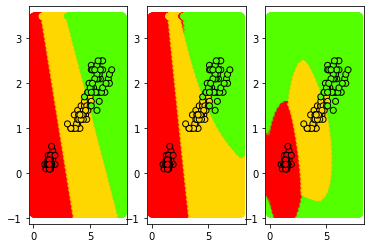

In [366]:
##work with iris dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
from sklearn.svm import SVC



X=load_iris().data[:,[2,3]]
Y=load_iris().target
#plt.scatter(X[:,0],X[:,1],c=Y)

##svm model
models=(SVC(kernel='linear', C=1),SVC(kernel='poly',degree=3,C=1),SVC(kernel='rbf', gamma=0.8, C=1))
models= [model.fit(X,Y) for model in models]

## make test data set
x_1=np.arange(X[:,0].min()-1,X[:,0].max()+1, 0.01)
x_2=np.arange(X[:,1].min()-1,X[:,1].max()+1, 0.01)
xx_1, xx_2=np.meshgrid(x_1,x_2)
x_test=np.c_[xx_1.reshape(-1),xx_2.reshape(-1)]
predicts=np.array([model.predict(x_test) for model in models])

##plot subplots
fig, ax = plt.subplots(1,3)
for i in range(0, 3):
    ax[i].scatter(xx_1,xx_2,c=predicts[i].reshape(xx_1.shape),cmap='prism')
    ax[i].scatter(X[:,0],X[:,1],c=Y,cmap='prism',edgecolors='k' )
    

<AxesSubplot:>

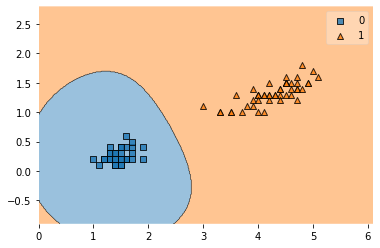

In [392]:
from mlxtend.plotting import plot_decision_regions
##work with iris dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
from sklearn.svm import SVC



X=load_iris().data[:,[2,3]]
Y=load_iris().target
## remove goup 2 from data set
X=X[Y !=2]
Y=Y[Y !=2]
#plt.scatter(X[:,0],X[:,1],c=Y)

##svm model
models=(SVC(kernel='linear', C=1),SVC(kernel='poly',degree=3,C=1),SVC(kernel='rbf', gamma=0.8, C=1))
models= [model.fit(X,Y) for model in models]

## make test data set
x_1=np.arange(X[:,0].min()-1,X[:,0].max()+1, 0.01)
x_2=np.arange(X[:,1].min()-1,X[:,1].max()+1, 0.01)
xx_1, xx_2=np.meshgrid(x_1,x_2)
x_test=np.c_[xx_1.reshape(-1),xx_2.reshape(-1)]
predicts=np.array([model.predict(x_test) for model in models])


#plot_decision_regions(X,Y,clf=models[0])
#plot_decision_regions(X,Y,clf=models[1])
plot_decision_regions(X,Y,clf=models[2])

<AxesSubplot:>

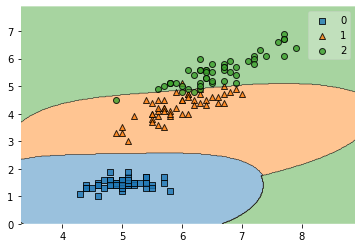

In [399]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

X=load_iris().data[:,[0,2]]
Y=load_iris().target
model=SVC(kernel='rbf', gamma='auto', C=0.5)
model.fit(X,Y)
plot_decision_regions(X,Y, clf=model)

# example 2: moon

<AxesSubplot:>

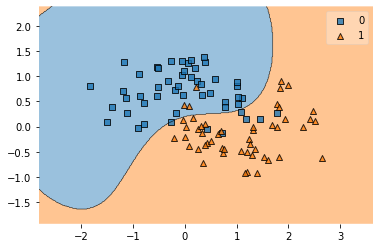

In [405]:
from sklearn.datasets import make_moons
X,Y=make_moons(n_samples=100,random_state=10, noise=0.3)
model=SVC(kernel='rbf', gamma='auto', C=0.5)
model.fit(X,Y)
plot_decision_regions(X,Y, clf=model)